In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Now it's time to download and save the file. 
C:\Users\aaust\OneDrive\Desktop\DA7\Projects\geospatial-python-workshop-tigerbelle07\data

In [2]:
neighborhood = gpd.read_file('../data/Neighborhood Association Boundaries (GIS) (1).geojson')
print(neighborhood.crs)
neighborhood

epsg:4326


,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,East Hill,"MULTIPOLYGON (((-86.74659 36.20376, -86.74559 ..."
4,Cleveland Park,"MULTIPOLYGON (((-86.75606 36.18857, -86.75600 ..."
...,...,...
283,River Plantation III,"MULTIPOLYGON (((-86.94600 36.06871, -86.94605 ..."
284,Porter Heights,"MULTIPOLYGON (((-86.70929 36.18842, -86.70942 ..."
285,Avondale Park,"MULTIPOLYGON (((-86.98693 36.07718, -86.98672 ..."
286,Travis Trace,"MULTIPOLYGON (((-87.01880 36.08394, -87.01866 ..."


In [3]:
type(neighborhood)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

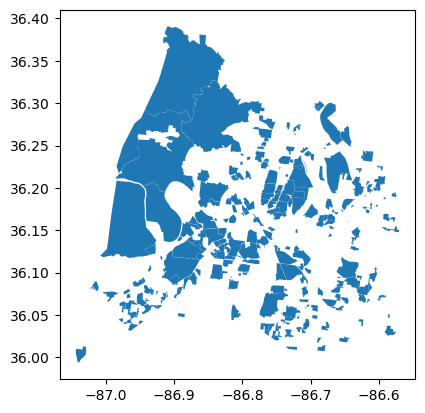

In [5]:
neighborhood.plot()

In [6]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


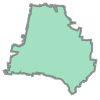

In [8]:
zipcodes.loc[2, 'geometry']

In [10]:
water_outage = pd.read_csv('../data/Metro_Service_Outages.csv')
print(water_outage.shape)
water_outage.head(3)

(10, 11)


,Location ID,Street Address,City,State,ZIP,Notes,Date Created,Date Modified,Status ID,Status Description,Mapped Location
0,3,344 PEACHTREE ST,NASHVILLE,TN,37210,Outage not confined to address shown. Customer...,10/06/2022,10/06/2022,2,Active Water Main Break (Repair In Progress),"344 PEACHTREE ST\nNASHVILLE, TN 37210\n(36.120..."
1,2,4060 KINGS LN,NASHVILLE,TN,37218,Outage not confined to address shown. Customer...,10/05/2022,10/05/2022,2,Active Water Main Break (Repair In Progress),"4060 KINGS LN\nNASHVILLE, TN 37218\n(36.216955..."
2,4,336 HARDING PL,NASHVILLE,TN,37211,Outage not confined to address shown. Customer...,10/05/2022,10/05/2022,1,Possible Water Main Break (under Investigation),"336 HARDING PL\nNASHVILLE, TN 37211\n(36.08680..."


In [11]:
water_outage.info

<bound method DataFrame.info of    Location ID         Street Address       City State    ZIP  \
0            3       344 PEACHTREE ST  NASHVILLE    TN  37210   
1            2          4060 KINGS LN  NASHVILLE    TN  37218   
2            4         336 HARDING PL  NASHVILLE    TN  37211   
3            1      410 CEDARCLIFF RD    ANTIOCH    TN  37013   
4            5  1725 HEIL QUAKER BLVD   LAVERGNE    TN  37086   
5            6      1209 JEFFERSON ST  NASHVILLE    TN  37208   
6            8          7515 PIPER CT    JOELTON    TN  37080   
7            7            808 hill rd  BRENTWOOD    TN  37027   
8            9          419 W TYNE DR  NASHVILLE    TN  37205   
9           10                    NaN  NASHVILLE    TN  37209   

                                               Notes Date Created  \
0  Outage not confined to address shown. Customer...   10/06/2022   
1  Outage not confined to address shown. Customer...   10/05/2022   
2  Outage not confined to address shown. Cust

I had to download another file - now will be using Traffic Accidents b/c the CSV file has both lat and log columns.

In [13]:
traffic_accidents = pd.read_csv('../data/Traffic_Accidents.csv')
print(traffic_accidents.shape)
traffic_accidents.head(3)

(223289, 25)


,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,Harmful Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location
0,20210274292,"May 17, 2021 06:42 PM",2.0,0,0,NaN,False,384403.0,4.0,ANGLE,...,MOTOR VEHICLE IN TRANSPORT,OLD HICKORY BLVD & NOLENSVILLE PKE,ANTIOCH,TN,37013.0,8757.0,SOUTH,36.0455,-86.7122,POINT (-86.7122 36.0455)
1,20210273720,"May 17, 2021 01:13 PM",2.0,0,0,NaN,False,902543.0,11.0,Front to Rear,...,MOTOR VEHICLE IN TRANSPORT,WEDGEWOOD AV & BEECH AV,NASHVILLE,TN,37204.0,6919.0,MIDTOW,36.1343,-86.7806,POINT (-86.7806 36.1343)
2,20210273098,"May 17, 2021 06:44 AM",2.0,0,0,NaN,True,226622.0,5.0,SIDESWIPE - SAME DIRECTION,...,MOTOR VEHICLE IN TRANSPORT,MM 2 9 I 440,NASHVILLE,TN,37212.0,6506.0,MIDTOW,36.1208,-86.8029,POINT (-86.8029 36.1208)
